**K-medias Imágenes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

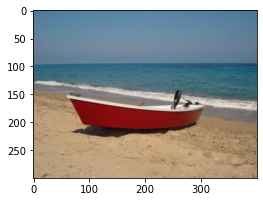

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)

#Paraetros y variables necesarias


In [20]:
#Paso 1: Definir el número de subgrupos
ue = {} #Unidades experimentales (Los pixeles)
k = 5   #Categorías para agrupar

#Paso 2: Definir centroides iniciales
centroides = []
for i in range(5):
    centroides.append([np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)])

#Extraer características de la imagen
Ir = np.reshape(I,(-1,3))   # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape
Ir = Ir.astype(float)

print(centroides)
#print(Ir)
#print(Ir[0:20])


[[44, 169, 170], [3, 237, 245], [42, 245, 249], [195, 201, 133], [199, 177, 206]]


[[6.244997998398398, 11.874342087037917, 13.856406460551018, 13.601470508735444, 15.427248620541512], [6.244997998398398, 11.874342087037917, 13.856406460551018, 13.601470508735444, 15.427248620541512], [6.244997998398398, 11.874342087037917, 13.856406460551018, 13.601470508735444, 15.427248620541512], [6.0, 11.74734012447073, 13.74772708486752, 13.490737563232042, 15.329709716755891], [6.0, 11.74734012447073, 13.74772708486752, 13.490737563232042, 15.329709716755891]]
120000


<BarContainer object of 5 artists>

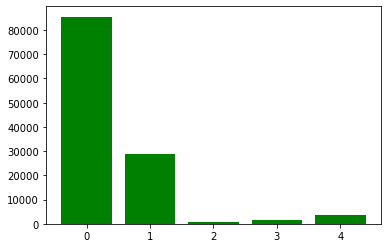

In [21]:
#Paso 3: Asignar las UE al centroide más cercano
distancias = Ir.copy().tolist()  #tolist() para mejorar el rendimiento de lecturas en la memoria
distancias = [
    [
            np.sqrt(abs(np.sum(Ir[i]-centroides[j])))
        for j in range(k)
    ]for i in range(Ir.shape[0])
]
#List comprehension

#print(distancias)
#print(distancias[0:5])

pertenencia = distancias.copy()
#print(len(pertenencia))
for i in range(len(pertenencia)):
    pertenencia[i] = distancias[i].index(min(distancias[i]))

histPertenencia = {j:pertenencia.count(j) for j in range(k)} # https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
plt.bar(histPertenencia.keys(), histPertenencia.values(), color='g')


In [38]:
#Paso 4: Calcular los nuevos centroides
